In [98]:
#library(plyr)
#library(reshape2)
library(missForest)

site = 'JSav'
year = 2012

base_dir =  paste('C:/Research_Flux_Towers//Flux_Tower_Data_by_Site//', site,'//', sep='')

soil_fname <- paste( base_dir, 'processed_soil/', site, '_', year, '_soilmet_qc_rbd.txt', sep='')
soil_dat <- read.csv(soil_fname)

met_fname <- paste( base_dir, 'processed_flux/', site, '_flux_all_', year, '_for_gap_filling_filled.txt', sep='')
header <- read.csv(met_fname, nrows=1, sep='\t')
met_dat <- read.csv(met_fname, skip=2, header=FALSE, sep='\t')

colnames(met_dat) <- colnames(header)
colnames(met_dat)

[1] "day"    "month"  "year"   "hour"   "minute" "qcNEE"  "NEE"    "LE"    
 [9] "H"      "Rg"     "Tair"   "Tsoil"  "rH"     "VPD"    "Ustar"  "Precip"

In [100]:
dat1 <- dat[grep('SWC', colnames(dat))]
dat2 <- dat1[!grepl( 'tcor|conv', colnames(dat1))]

if (nrow(dat2)==nrow(met_dat)){
    dat2 <- cbind(dat2, met_dat[c('Precip', 'VPD', 'Tair')])
}
colnames(dat2)

[1] "SWC_O1_5_AVG"  "SWC_O1_10_AVG" "SWC_O1_20_AVG" "SWC_O1_30_AVG"
 [5] "SWC_O2_5_AVG"  "SWC_O2_10_AVG" "SWC_O2_20_AVG" "SWC_O2_30_AVG"
 [9] "SWC_J1_5_AVG"  "SWC_J1_10_AVG" "SWC_J1_20_AVG" "SWC_J1_30_AVG"
[13] "SWC_J2_5_AVG"  "SWC_J2_10_AVG" "SWC_J2_30_AVG" "SWC_O3_5_AVG" 
[17] "SWC_O3_10_AVG" "SWC_O3_30_AVG" "SWC_J3_5_AVG"  "SWC_J3_10_AVG"
[21] "SWC_J3_30_AVG" "Precip"        "VPD"           "Tair"

In [40]:
?missForest


missForest             package:missForest              R Documentation

_N_o_n_p_a_r_a_m_e_t_r_i_c _M_i_s_s_i_n_g _V_a_l_u_e _I_m_p_u_t_a_t_i_o_n _u_s_i_n_g _R_a_n_d_o_m _F_o_r_e_s_t

_D_e_s_c_r_i_p_t_i_o_n:

     'missForest' is used to impute missing values particularly in the
     case of mixed-type data. It can be used to impute continuous
     and/or categorical data including complex interactions and
     nonlinear relations. It yields an out-of-bag (OOB) imputation
     error estimate.  Moreover, it can be run parallel to save
     computation time.

_U_s_a_g_e:

     missForest(xmis, maxiter = 10, ntree = 100, variablewise = FALSE,
                            decreasing = FALSE, verbose = FALSE,
                            mtry = floor(sqrt(ncol(xmis))), replace = TRUE,
                            classwt = NULL, cutoff = NULL, strata = NULL,
                            sampsize = NULL, nodesize = NULL, maxnodes = NULL,
                            xtrue = NA, parallelize = c('no', 'variables', 'forests'))
     
_A_r_g_u_m_e_n_t_s:

    xmis: a data matrix with missing values. The columns correspond to
          the variables and the rows to the observations.

 maxiter: maximum number of iterations to be performed given the
          stopping criterion is not met beforehand.

   ntree: number of trees to grow in each forest.

variablewise: logical. If 'TRUE' the OOB error is returned for each
          variable separately. This can be useful as a reliability
          check for the imputed variables w.r.t. to a subsequent data
          analysis.

decreasing: logical. If 'FALSE' then the variables are sorted w.r.t.
          increasing amount of missing entries during computation.

 verbose: logical. If 'TRUE' the user is supplied with additional
          output between iterations, i.e., estimated imputation error,
          runtime and if complete data matrix is supplied the true
          imputation error. See 'xtrue'.

    mtry: number of variables randomly sampled at each split. This
          argument is directly supplied to the 'randomForest' function.
          Note that the default value is sqrt(p) for both categorical
          and continuous variables where p is the number of variables
          in 'xmis'.

 replace: logical. If 'TRUE' bootstrap sampling (with replacements) is
          performed else subsampling (without replacements).

 classwt: list of priors of the classes in the categorical variables.
          This is equivalent to the randomForest argument, however, the
          user has to set the priors for all categorical variables in
          the data set (for continuous variables set it 'NULL').

  cutoff: list of class cutoffs for each categorical variable. Same as
          with 'classwt' (for continuous variables set it '1').

  strata: list of (factor) variables used for stratified sampling. Same
          as with 'classwt' (for continuous variables set it 'NULL').

sampsize: list of size(s) of sample to draw. This is equivalent to the
          randomForest argument, however, the user has to set the sizes
          for all variables.

nodesize: minimum size of terminal nodes. Has to be a vector of length
          2, with the first entry being the number for continuous
          variables and the second entry the number for categorical
          variables. Default is 1 for continuous and 5 for categorical
          variables.

maxnodes: maximum number of terminal nodes for trees in the forest.

   xtrue: optional. Complete data matrix. This can be supplied to test
          the performance. Upon providing the complete data matrix
          'verbose' will show the true imputation error after each
          iteration and the output will also contain the final true
          imputation error.

parallelize: should 'missForest' be run parallel. Default is 'no'. If
          'variables' the data is split into pieces of t

In [101]:
dat2_filled <- missForest(dat2, verbose=TRUE)

  missForest iteration 1 in progress...done!
    estimated error(s): 4.49131e-06 
    difference(s): 2.2976e-09 
    time: 796.77 seconds

  missForest iteration 2 in progress...done!
    estimated error(s): 4.126102e-06 
    difference(s): 3.227396e-10 
    time: 793.27 seconds

  missForest iteration 3 in progress...done!
    estimated error(s): 4.221285e-06 
    difference(s): 3.067898e-11 
    time: 782.68 seconds

  missForest iteration 4 in progress...done!
    estimated error(s): 4.322161e-06 
    difference(s): 1.701199e-11 
    time: 789.21 seconds

  missForest iteration 5 in progress...done!
    estimated error(s): 4.27368e-06 
    difference(s): 1.654623e-11 
    time: 790.84 seconds

  missForest iteration 6 in progress...done!
    estimated error(s): 4.280594e-06 
    difference(s): 1.869909e-11 
    time: 784.02 seconds



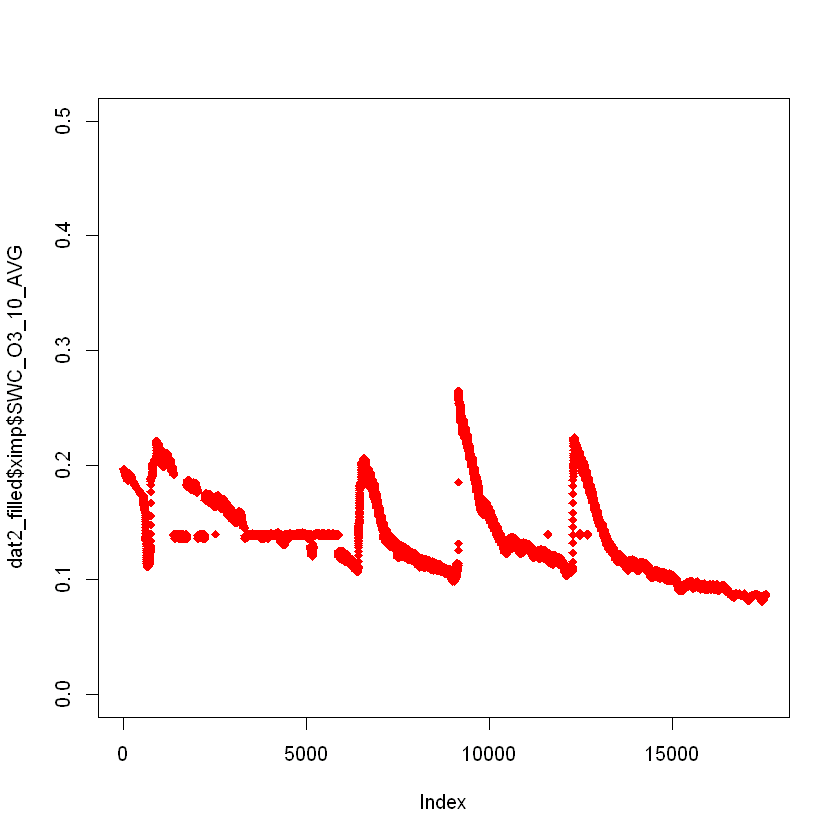

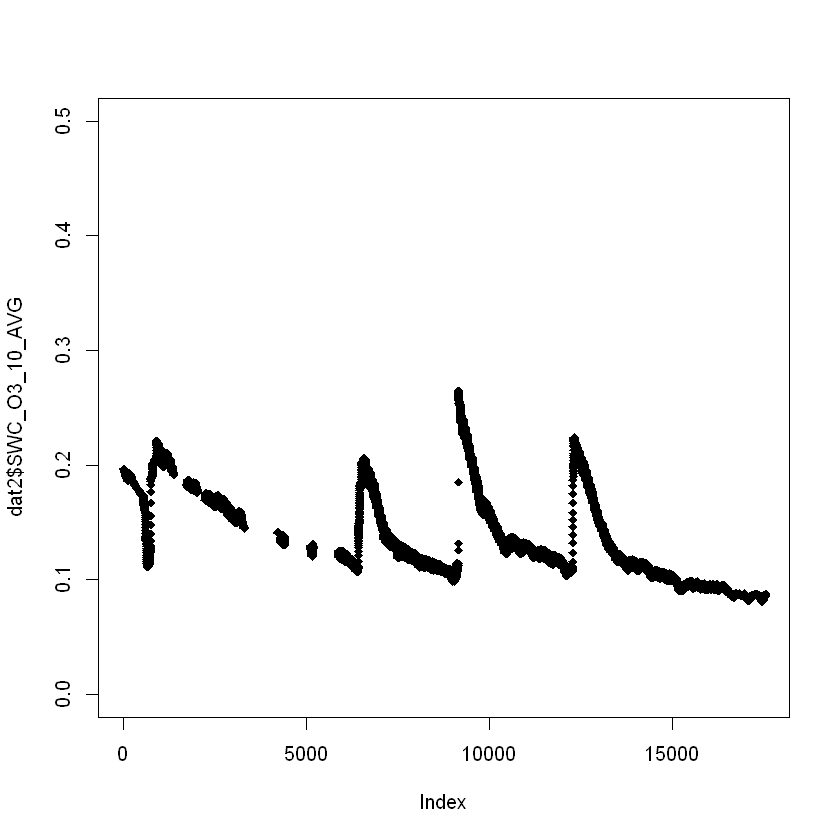

In [102]:
plot(dat2_filled$ximp$SWC_O3_10_AVG, pch=18, col='red', xlim=c(1,17500), ylim=c(0,0.5))
plot(dat2$SWC_O3_10_AVG, pch=18, col='black', xlim=c(1,17500), ylim=c(0,0.5))